# Lab 8: Kinetics of Aquation
This notebook will help you complete the data analysis required for the Kinetics of Aquation lab. It's split into 3 parts:
 - A. Load your data
 - B. Calculate absorbance constants
 - C. Find the rate constant

Additionally, there are optional parts to:
- D. Make the Arrhenius plot
- E. Plot the absorbance data

But the optional portions can be done on Excel. It is essential that ***all*** the cells in parts A-C ***are run sequentially*** or else your code ***will not work***.

Please make sure to read the instructions and comments carefully. Happy coding!

## Part A: Load your data

You should have the following data recorded in your notebook:
- Reaction time
- Absorbance at 450 nm
- Absorbance at 508 nm

### Save your data in an excel sheet

Create a spreadsheet with three columns labelled:
- Time
- Absorbance 450nm
- Absorbance 508nm

**Please make sure the column names are exactly as above, this is essential for the code to run properly.**

And enter your data in the respective columns and **save the file as an Excel sheet**. We will now upload the data into python and plot it.

### Load and view the data into python using `pandas`

The data is uploaded using a python module known as `pandas` which will store the data in a *dataframe*. In the blocks below, we will go through how to load the data and view it as well.

In [7]:
# First we need to load the python modules we need
# This is just pandas for now
import pandas as pd

# Now we need to load the data using the pandas read_excel function
# This function reads the data from an excel file and loads it into a pandas dataframe
# This is saved in a variable called data"
# Remember to change the filename to the correct path: keep the .xlsx at the end
data = pd.read_excel("ENTER YOUR FILENAME.xlsx", engine='openpyxl')

# now lets take a look at the data
print(data)


    Time  Absorbance 450nm  Absorbance 508nm
0    142           0.42012           0.23885
1    199           0.42983           0.28384
2    316           0.42965           0.36875
3    437           0.42699           0.45070
4    542           0.42606           0.53122
5    680           0.42536           0.60200
6    796           0.42457           0.66484
7    915           0.42451           0.70938
8   1037           0.42522           0.75003
9   1218           0.42636           0.79884
10  1516           0.43480           0.85980
11  1817           0.43641           0.89708
12  2115           0.43976           0.91965
13  2416           0.44489           0.93678


As we can see, the dataframe shows the same information as excel. Since it also preserves the column headings, we can use those to look at subsets of the data and call each column separately if necessary. This is important since we will need to do calculations using the two absorbance values.

The syntax to do this is as follows:
1. First, write the name of the variable that represents the *dataframe*
2. Next add square brackets
3. Add quotation marks inside the square brackets
4. Inside the quotes, enter the *exact* name of the column

So, for example, if I wanted to view just the absorbance at 450 nm I would use this code:

In [9]:
# Viewing only the absorbance at 450 nm
# We have to make sure that the column name is exactly the same as in the excel file
print(data['Absorbance 450nm'])

0     0.42012
1     0.42983
2     0.42965
3     0.42699
4     0.42606
5     0.42536
6     0.42457
7     0.42451
8     0.42522
9     0.42636
10    0.43480
11    0.43641
12    0.43976
13    0.44489
Name: Absorbance 450nm, dtype: float64


We can also view multiple columns at the same time by adding an extra square bracket and a comma between the column names!

In [10]:
# Viewing both the time and the absorbance at 450 nm
print(data[['Time', 'Absorbance 450nm']])

    Time  Absorbance 450nm
0    142           0.42012
1    199           0.42983
2    316           0.42965
3    437           0.42699
4    542           0.42606
5    680           0.42536
6    796           0.42457
7    915           0.42451
8   1037           0.42522
9   1218           0.42636
10  1516           0.43480
11  1817           0.43641
12  2115           0.43976
13  2416           0.44489


### Creating variables for each column

Now that we're a little more familiarized with dataframes, we can move onto doing calculations with the loaded data. However, before doing this, it is very helpful to store the columns in separate variables since the syntax for calling a variable is much shorter.

We will also convert the data into an *array* using the module `numpy`, this will make calculations easier.

In [11]:
# First let's import numpy
import numpy as np

# We'll store the columns as individual variables
# We will also convert the data to numpy arrays
time = np.array(data['Time'])
abs_450 = np.array(data['Absorbance 450nm'])
abs_508 = np.array(data['Absorbance 508nm'])

## Part B: Calculate the absorbance constants

Now we will run the calculations using the variables we set above.

From the lab notebook we know that the formulae to find the initial and final absorbance of the dichloro species are:

$$A_\infty = \frac{0.975 * A_{405}}{0.410}$$
$$A_0 = \frac{0.150 * A_{405}}{0.410}$$

Using the formulae, we can track the instantaneous concentration of $[M-Cl]_t$ using the absorbance. This can be done using the following method:
1. Find the average absorbance at the isosbestic point (450 nm)
2. Calculate $A_\infty$ and $A_0$ 
3. Calculate $A_\infty - A_t$ and $A_\infty - A_0$
4. Calculate $\ln \frac{A_\infty - A_t}{A_\infty - A_0}$ and $\frac{1}{A_\infty - A_t}$

More explicit details on the calculations are outlined in the lab handout.

In [12]:
# First find the average absorbance at 450 nm
abs_450_avg = np.mean(abs_450)

# Now find the maximum absorbance and minimum absorbance using the constants 
# given in the lab manual
abs_infinity = (0.975/0.410) * abs_450_avg
abs_0 = (0.150/0.410) * abs_450_avg

# Since we know the reaction is first order, we can find the "y-values" for the 
# first order plot using the formula:
n_1 = np.log((abs_infinity - abs_508)/(abs_infinity - abs_0))


## Part C: Find the rate constant

Now that we have the appropriate y-values, fit the data to the equation for a first order kinetic reaction using the formula:

$$\ln \left( \frac{A_\infty - A_t}{A_\infty - A_0} \right) = -kt$$

So, in order to find **k**, we need to perform a linear fit. 

### Fitting the data using a simple linear model
To fit, we'll be using the python library `scipy.stats`, and its corresponding linear regression class known as `linregress`. This is basically the python equivalent of **linest** in Excel. It will automatically fit our data to a linear model:
$$y = mx + c$$

To actually fit this, all we need to do is to call the function `linregress` which takes in two arguments:
- `x` = the independent variable
- `y` = the dependent variable

We will store the results of the fit as a variable `regression_results`

In [13]:
# Let's import the linregress function from scipy
from scipy.stats import linregress

# Now to perform the linear regression
# This is stored in a variable called regression_results
regression_results = linregress(x=time, y=n_1)

### Fit results
For ease, we'll store the fitted slope, intercept, the errors, and the $r^2$ as variables, and then print the results. We will also do the same for the respective errors.

In [14]:
# Here is the slope and y-intercept
# n1 refers to the first order reaction
slope_n1 = regression_results.slope
intercept_n1 = regression_results.intercept

# And the errors
slope_n1_err = regression_results.stderr
intercept_n1_err = regression_results.intercept_stderr

# And the r-squared value
r_squared_n1 = regression_results.rvalue**2

# We'll first print the results
# Printing the results
print(f'Slope = {slope_n1} ± {slope_n1_err}')
print(f'Intercept = {intercept_n1} ± {intercept_n1_err}')
print(f'r^2 = {r_squared_n1}')

Slope = -0.001022735867076141 ± 3.167663464718595e-05
Intercept = -0.018820574279136304 ± 0.03883873748197746
r^2 = 0.9886194955220416


### Find the fitted y-values for plotting

Using the fitted slope and intercept, we can visualize the "goodness of fit" by plotting both the fitted data and the experimental data on the same plot. 

To do this, we need to calculate the "fitted y-values" by using the calculated slope and intercept. Additionally, we want to extrapolate the fit, so it spans a longer range than the measurements we took: this will help us better visualize how the two variables relate to each other and how our good fit is.

In [15]:
import matplotlib.pyplot as plt

# We'll first create some equally spaced time values so the fit is extended
time_fit = np.linspace(0, 2500, 1000)

# Now we'll calculate the y-values for the fit using the equation of a line
n1_fit = slope_n1 * time_fit + intercept_n1

### Plotting using `matplotlib`

To create plots on python, we will be using a library called `matplotlib`, this is a very extensive library that can do a lot of powerful tasks. But we will only use some of is features for this course.

#### Creating a plot canvas
The first thing we want to do when plotting is to make sure our plot is well formatted. To do this, we will create a *canvas*. Think of this like hitting the **scatter plot** button in Excel to create an empty plot. We'll then label our axes.  
When you run this cell, you should see an empty plot with nicely formatted axes.

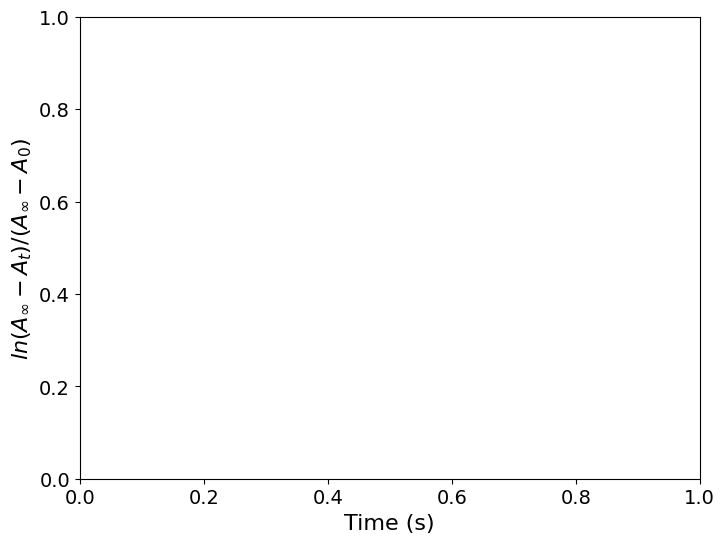

In [19]:
# Create a canvas for the figure thats 8pt wide and 6pt tall
plt.figure(figsize=(8, 6))

# This changes the fontsize of the ticks on the axis
plt.tick_params(labelsize=14)

# This labels the axis and also changes their fontsize
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('$ln(A_∞ - A_t)/(A_∞ - A_0)$', fontsize=16)

# This shows the plot
plt.show()

#### Adding data to the plot
This is done by calling `plt.plot` and having the x and y data in parentheses. Therefore, the general format for adding data to a plot looks like this:  
`plt.plot(x, y)`

For example, this is what the (unformatted) plot for just the absorbance at 450 and time would look like:

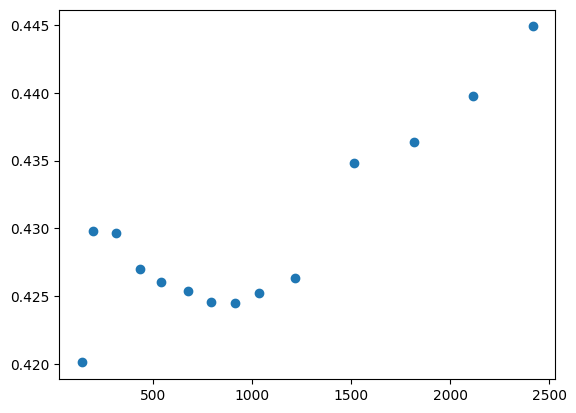

In [20]:
# An example plot of the time against the absorbance at 450 nm
# The 'o' argument tells matplotlib to plot the data points as circles
plt.plot(time, abs_450, 'o')

# Again, to show the plot
plt.show()

#### Combine everything and plot your data!

We'll combine both of the previous steps to plot the data we have. The experimental data is plotted as circles and the fitted data will be a line. You will notice that there are additional arguments for the functions described above, these arguments are described in the comments.

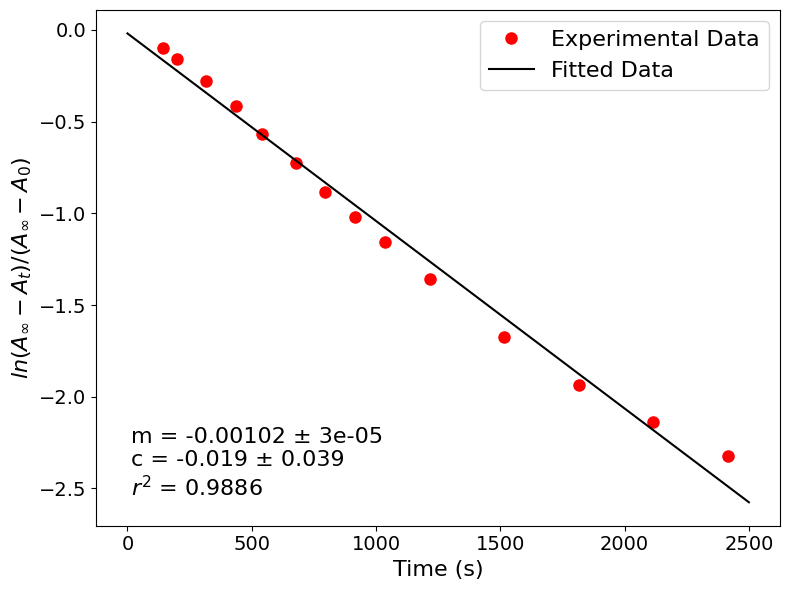

In [22]:
# Now to plot
# Creating the canvas, same as before 
plt.figure(figsize=(8, 6))

# Changing the size of labels
plt.tick_params(labelsize=14)

# Add the axes labels and their sizes
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('$ln(A_∞ - A_t)/(A_∞ - A_0)$', fontsize=16)

# This is plotting our specific data
# Plotting the experimental data as a scatter plot
# The 'o' argument tells matplotlib to plot the data points as circles
# The markersize argument changes the size of the circles
# The label argument is used to create a legend
# The color argument changes the color of the data points
plt.plot(time, n_1, 'o', markersize=8, label='Experimental Data', color='red')

# Now we do the same for the fitted data but as a line
# The '-' argument tells matplotlib to plot the data points as a line
# everything else is the same, we do not need a markersize for a line
plt.plot(time_fit, n1_fit, '-', label='Fitted Data', color='black')

# Additionally, we will add some text to the plot 
# to display the slope, intercept and r-squared value with their errors
# *this is not required syntax for you to know, but it is very useful*
plt.text(0.05, 0.05, 
         f'm = {round(slope_n1, 5)} ± {round(slope_n1_err, 5)}' + 
         f'\nc = {round(intercept_n1, 3)} ± {round(intercept_n1_err, 3)}' +
         f'\n$r^2$ = {r_squared_n1:0.4g}',
         ha='left', va='bottom', transform=plt.gca().transAxes, fontsize=16)

# Now we add the legend
plt.legend(fontsize=16)

# This makes sure that the plot is formatted correctly
plt.tight_layout()

plt.show()

## Part D (Optional): Arrhenius Plot

The Arrhenius equation is:

$$k = A\mathrm{e}^{-E_a/RT}$$

If we take $\ln$ of both sides we get a linear equation:

$$\ln k = \frac{E_a}{R}\frac{1}{T} + \ln A$$

So we can plot the temperature against the rate constants to get the activation energy.

The steps to do this is the same as before:
1. Create an Excel sheet with two columns: "Temperature (K)" and "Rate Constant" and save your data for the temperature and rate constants in their respective columns
2. Load the Excel sheet into python as a dataframe
3. Extract the columns as numpy arrays
4. Do some calculations to get the variables needed for the equation above
5. Perform a linear fit using the correct variables

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

# load the data
data = pd.read_excel("YOUR FILE NAME.xlsx", engine='openpyxl')

# extract columns and make everything into arrays
temperature = np.asarray(data['Temperature (K)'])
k = np.asarray(data['Rate Constant'])

# this takes the inverse of the temperature
temp_inv = 1/temperature

# this is the ln of the rate constant
ln_k = np.log(k)

# now we can plot and do a linear regression
result = linregress(x=temp_inv, y=ln_k)

# slope and y-intercept with errors
slope, slope_err = result.slope, result.stderr
intercept, intercept_err = result.intercept, result.intercept_stderr

print(f'Slope = {slope} ± {slope_err}')
print(f'Intercept = {intercept} ± {intercept_err}')

Now we will plot the results!

In [ ]:
import matplotlib.pyplot as plt

# same as before we'll create a canvas
plt.figure(figsize=(8, 6))

# changing the size of labels
plt.tick_params(labelsize=14)

# axis labels
plt.xlabel('1/T (K$^{-1}$)', fontsize=16)
plt.ylabel('ln(k)', fontsize=16)

# plot the data
plt.plot(temp_inv, ln_k, 'o', markersize=8, label='Experimental Data', color='red')
plt.plot(temp_inv, slope * temp_inv + intercept, '-', label='Fitted Data', color='black')

plt.legend(fontsize=16)

plt.tight_layout()
plt.show()

## Part E (Optional): Plotting the Absorbance Data

We took a lot of very nice UV-VIS scans of the reaction at different time points. It's helpful to plot all the scans together, so we can visualize how the reaction proceeded.

However, since we took 14 spectra, having a legend on the graph would not be visually appealing, and it'll be confusing to identify all plots! We can solve this by labelling our different datasets using a very nice colormap, this will help us track the reaction both visually and quantitatively.

The coding for this is complicated! So all you will need to do is:
- add the filename for the data that **you saved directly from the spectrometer** 
- create a *list* of the time-points at which you took your data.

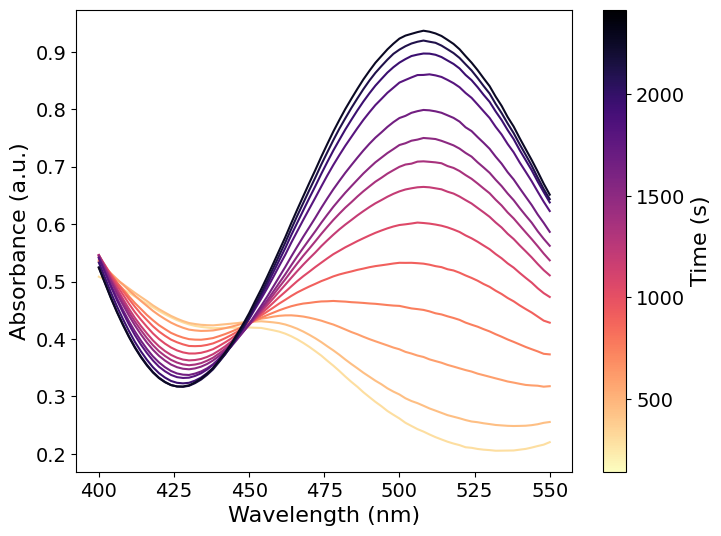

In [5]:
# In case you need to plot the UV-VIS Data: this is optional

# Importing all the necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from cycler import cycler

# ADD YOUR TIME POINTS HERE AS A LIST
# So separate your time values with commas
# For examples if you have 5 time points at 0, 10, 20, 30, 40 seconds:
# time = [0, 10, 20, 30, 40]
time = []

# Let's set a color palette
# for fun you can change this to: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
# make sure to keep the quotes
color = 'magma_r'

# Importing the data as a pandas dataframe: add your filename
# make sure to keep the .csv at the end
data = pd.read_csv('ADD YOUR FILENAME HERE.csv', encoding='UTF-16 LE', sep='\t')

# You do not need to change anything below this line
# -----------------------------------------------

# Creating the plot canvas
plt.figure(figsize=(8, 6))

# Now we can cycle the colors from the color palette
plt.gca().set_prop_cycle(cycler(color=sns.color_palette(color, len(time))))

# Setting the font size for the plot
plt.tick_params(labelsize=14)

# Plot each sample with the timestamp as the label
for index, column in enumerate(data.columns):
    if index > 0:
        plt.plot(data['Wavelength(nm)'], data[column], label=f'{time[index-1]}s')

# Add a colorbar to indicate the time points
norm = mcolors.Normalize(vmin=time[0], vmax=time[-1])
cmap = sns.color_palette(color, as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Settings for the colorbar
cbar = plt.colorbar(sm)
cbar.set_label('Time (s)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
cbar.ax.locator_params(nbins=6)

# Label the axes
plt.xlabel('Wavelength (nm)', fontsize=16)
plt.ylabel('Absorbance (a.u.)', fontsize=16)

plt.show()
    